# ML Lab Program 2

## Linear Regression
- Load a dataset with a continuous target variable (e.g., California Housing dataset).
- Implement a simple linear regression model to predict the target variable.
- Visualize the regression line and the residuals.

# California Housing dataset
## Data Set Characteristics:

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information: 
1. MedInc median income in block group

2. HouseAge median house age in block group

3. AveRooms average number of rooms per household

4. AveBedrms average number of bedrooms per household

5. Population block group population

6. AveOccup average number of household members

7. Latitude block group latitude

8. Longitude block group longitude

Missing Attribute Values: None

## Information about the dataset
- This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

- The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

- This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

- A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

- It can be downloaded/loaded using the following:
### sklearn.datasets.fetch_california_housing function

## Simple Linear Regression Model

In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [29]:
# Display the size of df
print(f"Dataset size: {df.shape}")
print(df.head())

Dataset size: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [30]:
# Display the first 5 rows of the dataset
print("Dataset:")
print(df.head())

Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [31]:
# Selecting a single feature for simple linear regression (e.g., average number of rooms 'AveRooms')
X = df[['AveRooms']] 
y = df['Price']

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train)
print("y_train:", y_train)

X_train:        AveRooms
14196  5.017657
8267   4.473545
17445  5.645833
14265  4.002817
2271   6.268421
...         ...
11284  6.129032
11964  6.868597
5390   3.986717
860    6.395349
15795  3.402576

[16512 rows x 1 columns]
y_train: 14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: Price, Length: 16512, dtype: float64


In [33]:
# Create the Linear Regression model
model = LinearRegression()

In [34]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the target variable using the test set
y_pred = model.predict(X_test)

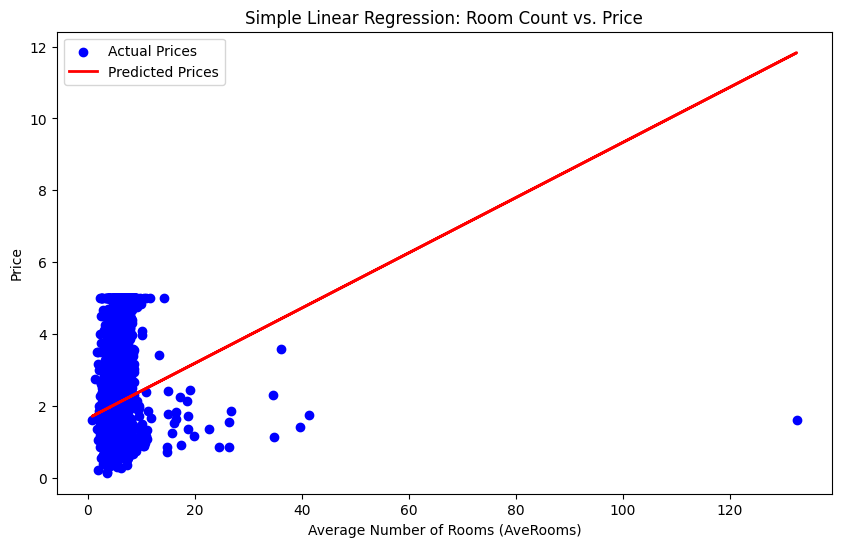

In [36]:
# Visualizing the regression line (for the test set)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices') # Scatter plot of actu
plt.plot(X_test, y_pred, color='red', label='Predicted Prices', linewidth=2) # Regressi
plt.xlabel("Average Number of Rooms (AveRooms)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Room Count vs. Price")
plt.legend()
plt.show()

In [37]:
# Plotting the residuals (difference between actual and predicted values)
residuals = y_test - y_pred

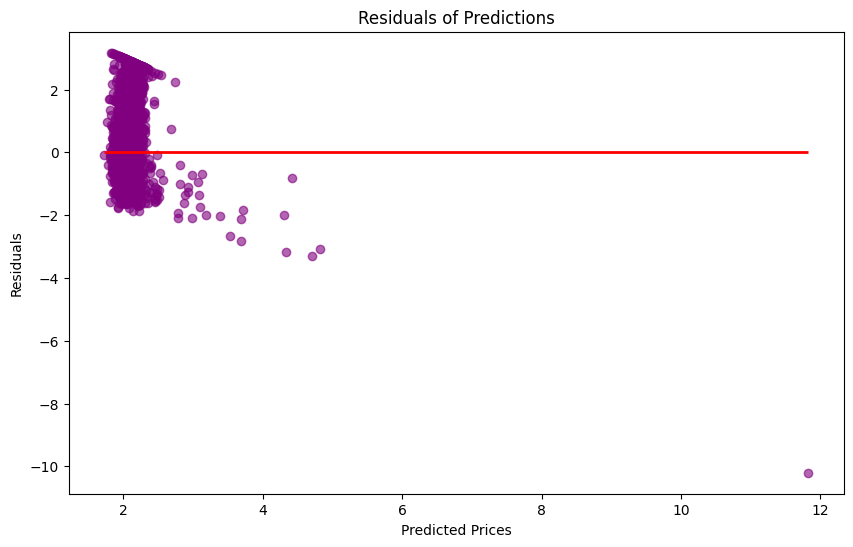

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2) # Horiz
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals of Predictions")
plt.show()

In [39]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2923314440807299


## Multiple Linear Regression Model

In [40]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
print(f"Dataset size: {df.shape}")
print(df.head())

Dataset size: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [42]:
# Using multiple features (for example: 'AveRooms', 'AveOccup', 'MedInc') for multiple linear regression
X = df[['AveRooms', 'AveOccup', 'MedInc']] 
y = df['Price']

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create the Linear Regression model
model = LinearRegression()

In [45]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict the target variable using the test set
y_pred=model.predict(X_test)

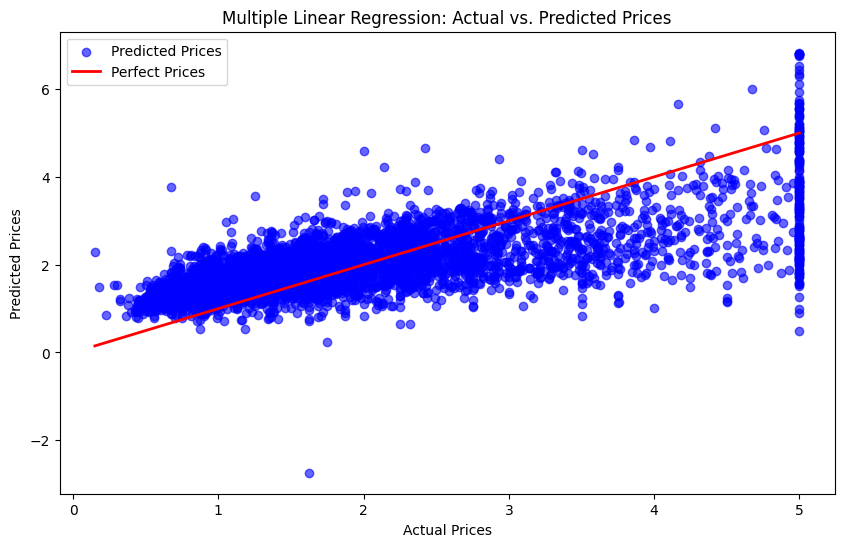

In [47]:
# Visualizing actual vs predicted prices (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Prices') # Predic
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression: Actual vs. Predicted Prices")
plt.legend()
plt.show()

In [48]:
# Plotting the residuals (difference between actual and predicted values)
residuals=y_test-y_pred

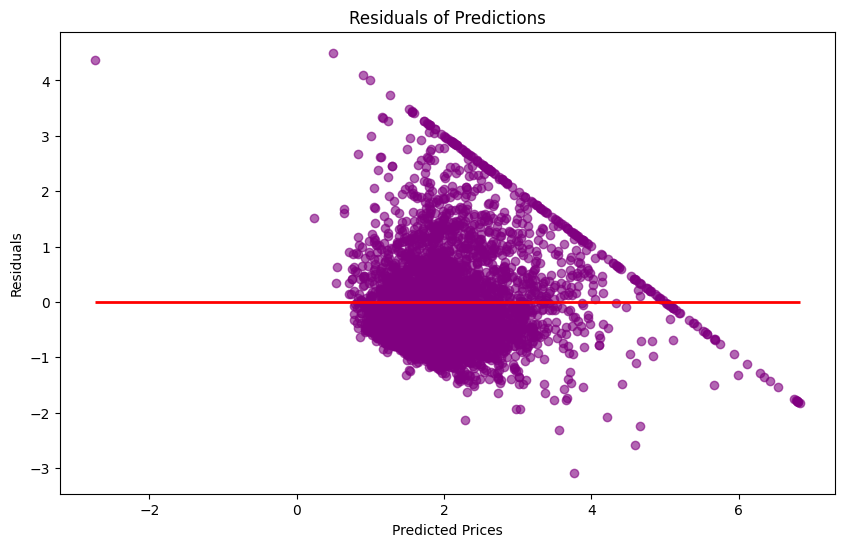

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2) # Horiz
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals of Predictions")
plt.show()

In [50]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7006855912225248


In [55]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Price, Length: 4128, dtype: float64

In [56]:
y_pred

array([1.15826883, 1.4999938 , 1.96250199, ..., 4.33715353, 1.60108676,
       1.9844191 ])

mean absolute error

In [57]:
diff = y_test - y_pred

In [59]:
absolute_diff = np.abs(diff)

sum_absolute_diff = np.sum(absolute_diff)

mae = sum_absolute_diff / len(y_test)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.6240235180253723


root mean squared error


In [60]:
squared_diff = diff ** 2
mean_squared_diff = np.mean(squared_diff)
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.8370696453835397
